In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
grossdf = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
namesdf = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
# not neccessary at the current time 
#akasdf = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
titlesdf = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
crewdf = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
principalsdf = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
#ratingsdf = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
#movieinfodf = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep='\t')
tmdbdf = pd.read_csv('data/zippedData/tmdb.movies.csv.gz', index_col=0)
budgetdf = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
#reviewsdf = pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding = 'unicode_escape')
#I don't really know what this encoding parameter is doing but I got it to open the data!


In [3]:
#reviewsdf.head()

In [4]:
#reviewsdf.info()

In [5]:
grossdf.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
grossdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
namesdf.head()


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [8]:
namesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [9]:
#akasdf.head()


In [10]:
#akasdf.info()

In [11]:
titlesdf.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
titlesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
crewdf.head()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [14]:
crewdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [15]:
principalsdf.head()


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [16]:
principalsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [20]:
#ratingsdf.head()


NameError: name 'ratingsdf' is not defined

In [ ]:
#ratingsdf.info()

In [ ]:
#movieinfodf.head()


In [ ]:
#movieinfodf.info()

In [ ]:
#tmdbdf.head()


In [ ]:
#tmdbdf.info()

In [19]:
budgetdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
budgetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


I've located the top net grossing films and now want to figure out why they are so successful

In [27]:
#highest grossing movies
#removed the commas and dollar signs from the data so that it could be converted
#reassigned the data to a float type instead of object so that it may be sorted properly 
#(as obj the grosses starting closest to 999 were listed first)
# created a copy of the budget dataframe sorted by the highest worldwide gross
budgetdf.replace(',','', regex=True, inplace=True)
budgetdf.replace('\$','', regex=True, inplace=True)
budgetdf['production_budget'] = budgetdf['production_budget'].astype(float)
budgetdf['worldwide_gross'] = budgetdf['worldwide_gross'].astype(float)
budgetdf['domestic_gross'] = budgetdf['domestic_gross'].astype(float)
budgetdf['production_budget'] = budgetdf['production_budget'].astype(int)
budgetdf['worldwide_gross'] = budgetdf['worldwide_gross'].astype(int)
budgetdf['domestic_gross'] = budgetdf['domestic_gross'].astype(int)
budgetdf['release_date'] = pd.to_datetime(budgetdf['release_date'])
budgetdf = budgetdf[budgetdf['release_date'].dt.year >= 2001]
budgetdf['total_net_gross'] = budgetdf['worldwide_gross'] - budgetdf['production_budget']
highestgrossdf = budgetdf.sort_values(by='total_net_gross', ascending=False)
highestgrossdf



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_net_gross
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
0,1,2009-12-18,Avatar,425000000,760507625,-2147483648,1722483648
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794
...,...,...,...,...,...,...,...
352,53,2001-04-27,Town & Country,105000000,6712451,10364769,-94635231
341,42,2019-06-14,Men in Black: International,110000000,3100000,3100000,-106900000
193,94,2011-03-11,Mars Needs Moms,150000000,21392758,39549758,-110450242
194,95,2020-12-31,Moonfall,150000000,0,0,-150000000


Text(0, 0.5, 'Gross')

C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\ma

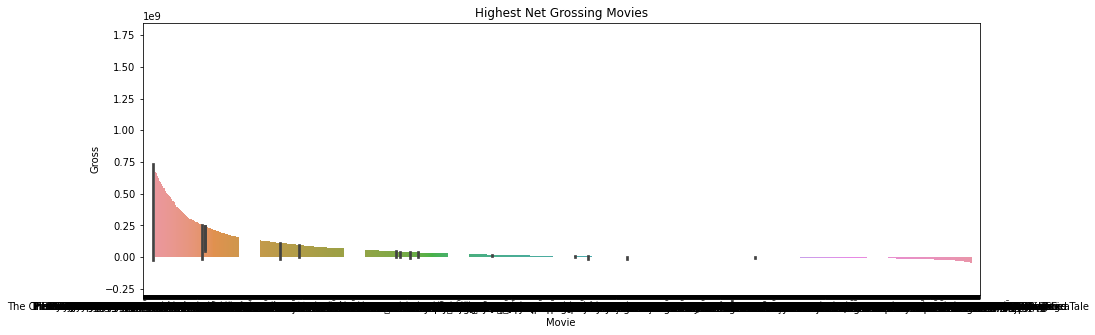

In [29]:
fig, ax = plt.subplots(figsize=(15,5))

sns.barplot(x = highestgrossdf['movie'], y = highestgrossdf['total_net_gross'])
ax.set_title('Highest Net Grossing Movies')
ax.set_xlabel('Movie')
ax.set_ylabel('Gross')

In [ ]:
namesdf

In [ ]:
#dropping the birth year and death year columns
namesdf = namesdf.drop(['birth_year', 'death_year'], axis=1)

In [ ]:
namesdf